In [1]:
from numpy import sin,cos,pi
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def alpha_l(l,lambda_var,L):
    k=pi*np.arange(0,L)/L
    sum_var=sin(k)*sin(l*k)/((cos(k)-lambda_var)**2+sin(k)**2)
    sum_var=-1.0* sum_var/4.0/L
    sum_var=np.sum(sum_var)
    return sum_var

In [4]:
def alpha_l_theor_big_lambda(lambda_var,l): #lambda_var is greater than 1
    x= lambda_var**(-l-1)
    x=-x/8.0
    return x

def alpha_l_theor_small_lambda(lambda_var,l): #lambda_var is smaller than 1
    x= lambda_var**(l-1)
    x=-x/8.0
    return x

In [101]:
L=14
lambda_var=2.0
l_arr=np.arange(1,L)# string of length L is ignored
alpha_arr=np.zeros(len(l_arr))
for i in range(len(l_arr)):
    alpha_arr[i]=alpha_l(l_arr[i],lambda_var,L)

In [65]:
def error(x1,x2,L):
    return np.abs(np.sum(x1**2-x2**2)/(L-1))

In [148]:
lambda_var=2.0
L=1
L_arr=np.zeros(20)
err_arr=np.zeros(20)
for j in range(20):
    L_arr[j]=L
    l_arr=np.arange(1,L)
    alpha_arr=np.zeros(len(l_arr))
    for i in range(len(l_arr)):
        alpha_arr[i]=alpha_l(l_arr[i],lambda_var,L)
    x1=alpha_arr
    x2=alpha_l_theor_big_lambda(lambda_var,l_arr)
    L=L+1
    err_arr[j]=error(x1,x2,L)
    print L_arr[j].astype(int),err_arr[j]

1 0.0
2 0.00017578125
3 6.44029313114e-05
4 1.92883765409e-05
5 5.35425621212e-06
6 1.43137844738e-06
7 3.74712515197e-07
8 9.68609963411e-08
9 2.48354855048e-08
10 6.33300712613e-09
11 1.60864893792e-09
12 4.07453679997e-10
13 1.02982788056e-10
14 2.59855631217e-11
15 6.54836187414e-12
16 1.6484591513e-12
17 4.14622570807e-13
18 1.04212911928e-13
19 2.6177879922e-14
20 6.57252516287e-15


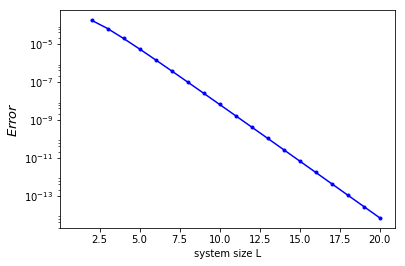

In [149]:
plt.semilogy(L_arr.astype(int), err_arr, 'b.-')
plt.xlabel("system size L")
#plt.title("L=14")
plt.ylabel(r"$Error$", fontsize=13)
#plt.legend(loc='best')
plt.savefig("error_alpha.eps")

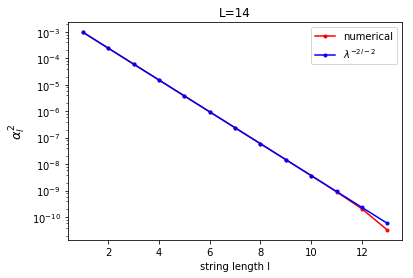

In [115]:
plt.semilogy(l_arr, alpha_arr**2, 'r.-', label='numerical')
plt.semilogy(l_arr, alpha_l_theor_big_lambda(lambda_var,l_arr)**2, 'b.-', label=r'$\lambda^{-2l-2}$')
plt.legend(loc='best')
plt.xlabel("string length l")
plt.title("L=14")
plt.ylabel(r"$\alpha_l^2$", fontsize=13)
plt.savefig("alpha_num_theoret.eps")

In [100]:
print alpha_l_theor_big_lambda(lambda_var,l_arr)[-1]**2- alpha_arr[-1]**2
print alpha_l_theor_big_lambda(lambda_var,l_arr)[-2]**2- alpha_arr[-2]**2

2.54658514058e-11
2.81943342303e-11


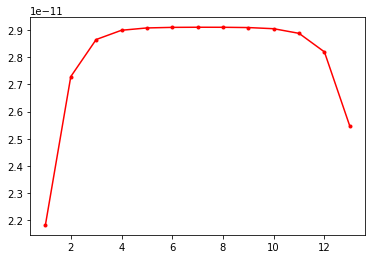

In [95]:
plt.plot(l_arr, np.abs(alpha_arr**2-alpha_l_theor_big_lambda(lambda_var,l_arr)**2), 'r.-')
#plt.semilogy(l_arr, , 'b.-')

### Norm of gauge potential: comparing it with ED method

In [2]:
x1,y1,w1,z1=np.loadtxt("v2_mu1e-10_int_L_scaling.dat",unpack=True,skiprows=2 )

In [7]:
def alpha_l(l,lambda_var,L):
    k=pi*np.arange(0,L)/L
    sum_var=sin(k)*sin(l*k)/((cos(k)-lambda_var)**2+sin(k)**2)
    sum_var=-1.0* sum_var/4.0/L
    sum_var=np.sum(sum_var)
    return sum_var

def norm_gauge(L, lambda_var):
    l_arr=np.arange(1,L)# string of length L is ignored
    alpha_arr=np.zeros(len(l_arr))
    for i in range(len(l_arr)):
        alpha_arr[i]=alpha_l(l_arr[i],lambda_var,L)
    return 2*np.sum((L*np.ones(L-1)-l_arr)*alpha_arr**2)  

def alpha_l_theor_big_lambda(lambda_var,l): #lambda_var is greater than 1
    x= lambda_var**(-l-1)
    x=-x/8.0
    return x

def norm_gauge_GP(L, lambda_var):
    l_arr=np.arange(1,L)# string of length L is ignored
    alpha_arr=alpha_l_theor_big_lambda(lambda_var,l_arr)
    return 2*np.sum((L*np.ones(L-1)-l_arr)*alpha_arr**2)

In [8]:
L=2
L_tot=13
L_arr=np.zeros(L_tot)
norm_arr=np.zeros(L_tot)
norm_GP_arr=np.zeros(L_tot)
lambda_var=5.0
for i in range(L_tot):
    L_arr[i]=L
    norm_arr[i]=norm_gauge(L, lambda_var)
    norm_GP_arr[i]=norm_gauge_GP(L, lambda_var)
    print L_arr[i], norm_arr[i],norm_GP_arr[i]
    L=L+1

2.0 4.62278106509e-05 5e-05
3.0 0.00010153645225 0.000102
4.0 0.000154042527551 0.00015408
5.0 0.000206160687777 0.0002061632
6.0 0.000258246376738 0.000258246528
7.0 0.000310329852629 0.00031032986112
8.0 0.000362413193991 0.000362413194445
9.0 0.000414496527754 0.000414496527778
10.0 0.00046657986111 0.000466579861111
11.0 0.000518663194444 0.000518663194444
12.0 0.000570746527778 0.000570746527778
13.0 0.000622829861111 0.000622829861111
14.0 0.000674913194444 0.000674913194444


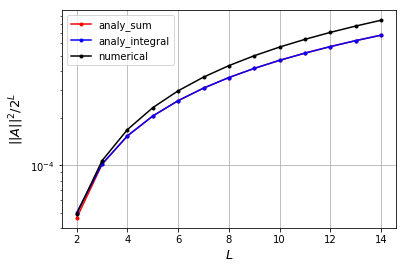

In [77]:
plt.semilogy(L_arr, norm_arr, 'r.-', label='analy_sum')
plt.semilogy(L_arr, norm_GP_arr, 'b.-', label='analy_integral')
plt.semilogy(x1,y1, 'k.-', label='numerical')
plt.grid()
#plt.title(r"$\mu=10^{-10}$")
plt.ylabel(r"$||A||^2/2^L$", fontsize=13)
plt.xlabel(r"$L$", fontsize=13)
plt.legend(loc='best')
plt.savefig("OBC_int_comparing_num_anal_norm_L_scaling.eps")

In [48]:
x1,y1,w1,z1=np.loadtxt("v2_mu1e-10_int_L_scaling.dat",unpack=True,skiprows=2 )
x3,y3,w3,z3=np.loadtxt("v2_mu1e-30_int_L_scaling.dat",unpack=True,skiprows=2 )

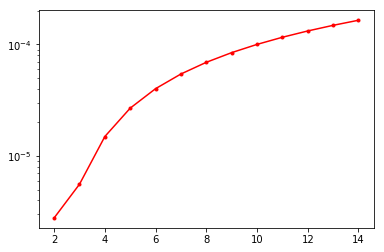

In [16]:
plt.semilogy(L_arr, y1-norm_arr, 'r.-', label='analy')

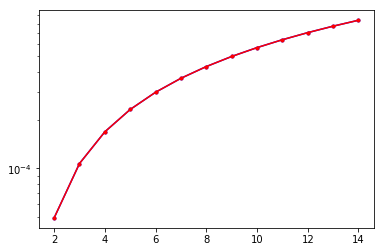

In [49]:
plt.semilogy(x1,y1, 'b.-')
plt.semilogy(x3,y3, 'r.-')

In [51]:
print  np.abs(y3-y1)

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


### integrable model: periodic boundary condition

In [9]:
x2,y2,w2,z2=np.loadtxt("PBC_v2_mu1e-10_int_L_scaling.dat",unpack=True,skiprows=2 )

In [11]:
def alpha_l(l,lambda_var,L):
    k=pi*np.arange(0,L)/L
    sum_var=sin(k)*sin(l*k)/((cos(k)-lambda_var)**2+sin(k)**2)
    sum_var=-1.0* sum_var/4.0/L
    sum_var=np.sum(sum_var)
    return sum_var

def norm_gauge_pbc(L, lambda_var):
    l_arr=np.arange(1,L+1)# string of length L is ignored
    alpha_arr=np.zeros(len(l_arr))
    for i in range(len(l_arr)): #L-1 times it runs
        alpha_arr[i]=alpha_l(l_arr[i],lambda_var,L)
    return 2*L*np.sum(alpha_arr**2)

def norm_gauge_GP_PBC(L, lambda_var):
    l_arr=np.arange(1,L+1)# string of length L is ignored
    alpha_arr=alpha_l_theor_big_lambda(lambda_var,l_arr)
    return 2*L*np.sum(alpha_arr**2)

In [19]:
L=2
L_tot=13
L_arr=np.zeros(L_tot)
norm_arr_pbc=np.zeros(L_tot)
norm_GP_PBC_arr=np.zeros(L_tot)
lambda_var=5.0
for i in range(L_tot):
    L_arr[i]=L
    print L_arr[i], alpha_l(L,lambda_var,L)
    L=L+1

2.0 -5.8877249959e-19
3.0 1.4933855128e-19
4.0 -1.8811410042e-19
5.0 1.29169779728e-19
6.0 -1.12897152112e-19
7.0 9.53801218829e-20
8.0 -8.3722244809e-20
9.0 7.43192810631e-20
10.0 -6.68844045649e-20
11.0 6.07872109414e-20
12.0 -5.92921613295e-19
13.0 -7.90023949347e-19
14.0 -8.22485842183e-19


In [12]:
L=2
L_tot=13
L_arr=np.zeros(L_tot)
norm_arr_pbc=np.zeros(L_tot)
norm_GP_PBC_arr=np.zeros(L_tot)
lambda_var=5.0
for i in range(L_tot):
    L_arr[i]=L
    norm_arr_pbc[i]=norm_gauge_pbc(L, lambda_var)
    norm_GP_PBC_arr[i]=norm_gauge_GP_PBC(L, lambda_var)
    print L_arr[i], norm_arr_pbc[i],norm_GP_PBC_arr[i]
    L=L+1

2.0 9.24556213018e-05 0.000104
3.0 0.000155069832303 0.00015624
4.0 0.000208244799511 0.0002083328
5.0 0.000260410959999 0.00026041664
6.0 0.00031249966464 0.00031249999872
7.0 0.000364583314816 0.000364583333274
8.0 0.000416666665689 0.000416666666664
9.0 0.00046874999995 0.00046875
10.0 0.000520833333331 0.000520833333333
11.0 0.000572916666667 0.000572916666667
12.0 0.000625 0.000625
13.0 0.000677083333333 0.000677083333333
14.0 0.000729166666667 0.000729166666667


In [15]:
x2[0], y2[0], norm_arr_pbc[0]

(2.0, 0.0001849112426035511, 9.2455621301775159e-05)

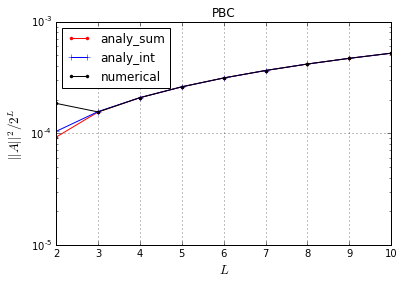

In [13]:
plt.semilogy(L_arr[0:9], norm_arr_pbc[0:9], 'r.-', label='analy_sum')
plt.semilogy(L_arr[0:9],norm_GP_PBC_arr[0:9], 'b+-', label='analy_int')
plt.semilogy(x2[0:],y2[0:], 'k.-', label='numerical')
plt.grid()
plt.title(r"PBC")
plt.ylabel(r"$||A||^2/2^L$", fontsize=13)
plt.xlabel(r"$L$", fontsize=13)
plt.legend(loc='best')
#plt.savefig("PBC_int_comparing_num_anal_norm_L_scaling.eps")

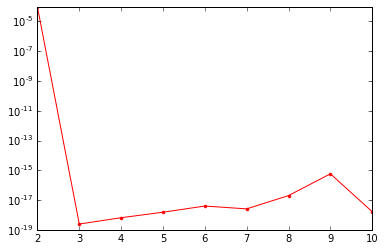

In [16]:
plt.semilogy(L_arr[0:9], np.abs(y2[0:]-norm_arr_pbc[0:9]), 'r.-')

In [64]:
L=2
J=1
print [[J,i,(i+1)%L] for i in range(L)]

[[1, 0, 1], [1, 1, 0]]


In [46]:
alpha2= 16*(1+25.0)
norm=2*64.0/alpha2**2
print norm/2**2
print y2[0]

0.000184911242604
0.000184911242604


We find that PBC result matches with analytical results. But not the open boundary condition one. Why is that?

In [47]:
norm=8.0/alpha2**2
print norm
print y1[0]
print 100*(norm-y1[0])/y1[0]
print 100*(norm-y1[0])/norm

4.62278106509e-05
4.90148024703e-05
-5.68602071006
-6.02882070385


In [30]:
from quspin.operators import hamiltonian # Hamiltonians and operators
from quspin.basis import spin_basis_1d # Hilbert space spin basis
def Ham_int_antiferro(L,hz):
    basis = spin_basis_1d(L)
    J=1.0
    hz_arr = [[hz,i] for i in range(L)] # OBC
    J_arr =[[J,i,(i+1)] for i in range(L-1)] # OBC# [[J,i,(i+1)%L] for i in range(L)] # PBC 
    # static and dynamic lists
    static = [["zz",J_arr],["x",hz_arr]]
    dynamic =[]
    H = hamiltonian(static,dynamic,basis=basis,dtype=np.complex_,check_symm=False,check_herm=False)
    return H


def del_lambda_Ham(L):
    basis = spin_basis_1d(L)  
    hx_lamb=1.0
    hx_lamb_arr = [[hx_lamb,i] for i in range(L)] 
    static_lamb = [["x",hx_lamb_arr]]
    dynamic_lamb =[]
    op_lamb=hamiltonian(static_lamb,dynamic_lamb,basis=basis,dtype=np.complex_,check_symm=False,check_herm=False)
    return op_lamb

def output_gauge_potent(Ham,L):
	E,V= Ham.eigh()
	V_mat=np.matrix(V)
    	V_mat_H=V_mat.H
    	op_lamb_mat = np.matrix(del_lambda_Ham(L).toarray())
    	num_lamb_mat =  (V_mat_H)*(op_lamb_mat*V_mat) #matrix multiplication
    	wij = np.outer(E,np.ones(2**L))-np.outer(np.ones(2**L),E)
	return wij, num_lamb_mat
  
def gauge_potent_mu(wij,num_lamb_mat,mu):
    A_lamb = -1j*np.multiply(wij,num_lamb_mat)/(wij**2+ mu**2)#element-wise multiplication
    return A_lamb

def norm(A_lamb):    
    return np.linalg.norm(A_lamb, 'fro')

In [18]:
L=2
Ham=Ham_int_antiferro(L,5.0)

In [45]:
mu=1e-4
wij, num_lamb_mat=output_gauge_potent(Ham,L)
A_lamb=gauge_potent_mu(wij, num_lamb_mat,mu)
print norm(A_lamb)**2/2**L

4.90148024679e-05


In [ ]:
4.90148024703e-05

In [39]:
print wij
print np.multiply(wij,num_lamb_mat)

[[  0.          -9.04987562 -11.04987562 -20.09975124]
 [  9.04987562   0.          -2.         -11.04987562]
 [ 11.04987562   2.           0.          -9.04987562]
 [ 20.09975124  11.04987562   9.04987562   0.        ]]
[[ -0.00000000e+00+0.j  -9.53440953e-16+0.j  -2.34618044e-14+0.j
   -4.00000000e+00+0.j]
 [  1.00473803e-15+0.j   0.00000000e+00+0.j   1.97215226e-31-0.j
    1.22678263e-15-0.j]
 [  2.20820874e-14+0.j  -1.97215226e-31+0.j  -0.00000000e+00+0.j
    4.01895211e-15-0.j]
 [  4.00000000e+00+0.j  -1.28637020e-15+0.j  -4.29192129e-15+0.j
    0.00000000e+00+0.j]]


4.90148024703e-05
